In [ ]:
!pip install pandas matplotlib openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ProyectoMBD.xlsx to ProyectoMBD.xlsx


In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo Excel
excel_file = 'ProyectoMBD.xlsx'

# Leer todas las hojas
xls = pd.ExcelFile(excel_file)

# Función para identificar outliers usando el rango intercuartílico (IQR)
def identify_outliers(df):
    # Solo considerar columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers

# Iterar sobre cada hoja y verificar los outliers
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    outliers = identify_outliers(df)
    print(f"Outliers en la hoja '{sheet_name}':")
    for column, values in outliers.items():
        print(f" - {column}: {values.values}")
    print("\n")

Outliers en la hoja 'Hoja1':
 - # Semana: []
 - DIATOMEAS: [370000. 255000. 270000. 255000. 310000. 255000. 290000. 265000. 315000.
 255000.]
 - CIANOPHYTAS: [360000. 400000. 460000. 390000. 360000. 390000. 610000. 505000. 500000.
 445000. 395000. 620000. 550000. 500000. 400000. 820000. 420000. 480000.]
 - CLOROPHYTAS: [100000.  90000.  95000. 130000. 110000. 170000. 110000. 190000. 140000.
 120000.  90000.  95000.  90000.  90000. 115000.  97500. 170000. 110000.
  90000.  90000.  90000. 110000. 130000.  90000. 110000. 100000.  95000.
  90000. 130000.  90000. 125000. 130000.  90000.  90000.  90000. 400000.
  90000.]
 - PESO: [55.3 56.5 60.2 58.  55.6 55.8 59.6 55.3 57.  56.6 55.6 58.  59.8 56.2
 55.5]
 - Inc Semanal: [7.9 7.3 7.7 8.4 7.9 8.3 7.8 7.8 7.4 8.1]
 - PROTOZOARIOS: [2120. 1200. 1800. 1360.  920. 1180.  980.  880.  760.  820.  720.  800.
  650.  630.  790.  730.  780.  920.  980.  660.  800. 1040. 1580.  700.
  620.  960. 1920.  710.  680.  960. 1100.  770.  827.  720.  660.  6

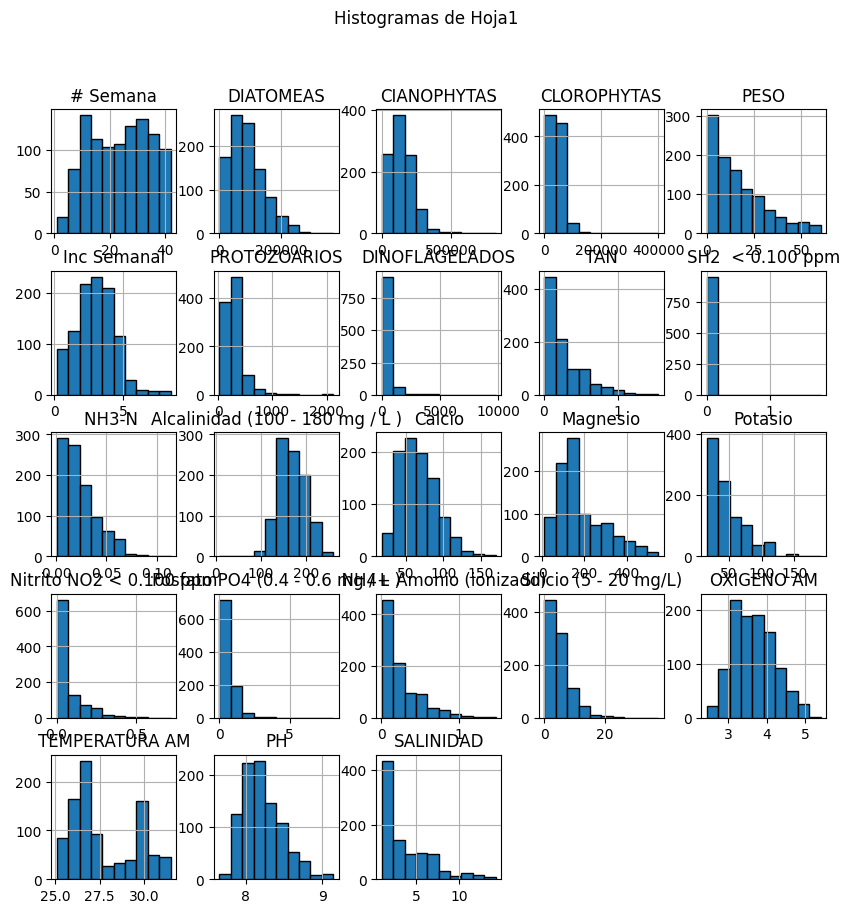

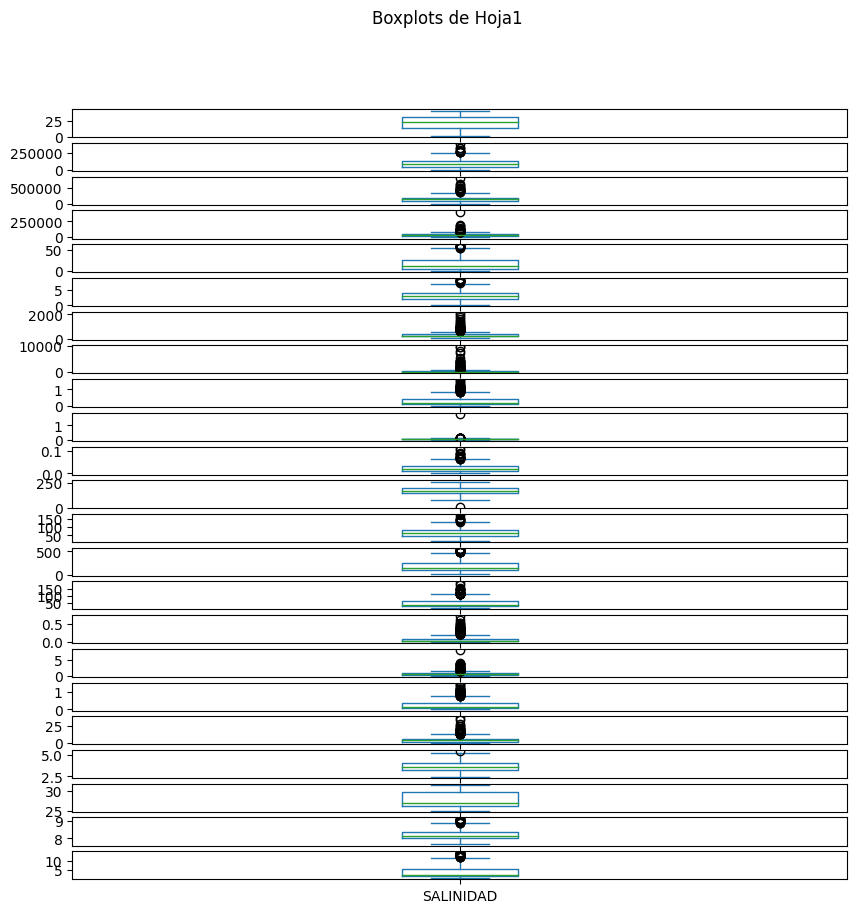

<ipython-input-8-3d216505d530>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
# Función para rellenar NaN con la mediana y calcular la mediana de las columnas
def calculate_and_fill_median(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        df[column].fillna(df[column].median(), inplace=True)
    return df

# Función para generar histogramas y boxplots
def generate_plots(df, sheet_name):

    # Import matplotlib.pyplot here
    import matplotlib.pyplot as plt

    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Crear histogramas
    df[numeric_columns].hist(bins=10, edgecolor='black', figsize=(10, 10))
    plt.suptitle(f'Histogramas de {sheet_name}')
    plt.show()

    # Crear boxplots
    df[numeric_columns].plot(kind='box', subplots=True, layout=(len(numeric_columns), 1), figsize=(10, 10))
    plt.suptitle(f'Boxplots de {sheet_name}')
    plt.show()

# Iterar sobre cada hoja, generar gráficos, calcular la mediana y sobrescribir el archivo
median_filled_data_frames = {}

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    generate_plots(df, sheet_name)
    median_filled_data_frames[sheet_name] = calculate_and_fill_median(df) # Assigning value before accessing

In [ ]:
# Sobrescribir el archivo Excel con los datos modificados
with pd.ExcelWriter('ProyectoMBD_MST_ML.xlsx') as writer:
    for sheet_name, df in median_filled_data_frames.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [ ]:
# Descargar el archivo modificado
from google.colab import files
files.download('ProyectoMBD_MST_ML.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>